Beijing - Polution Dataset

https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data



In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [4]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_data_2010.1.1-2014.12.31.csv to PRSA_data_2010.1.1-2014.12.31.csv


In [5]:
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [6]:
#EDA
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [8]:
#checking nulls

df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [9]:
#getting datetime format

df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'], hour=row['hour']), axis=1)

In [10]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [11]:
#getting Min and Max dataset dates
print('Initial date ',df['datetime'].min())
print('Final date ',df['datetime'].max())

Initial date  2010-01-01 00:00:00
Final date  2014-12-31 23:00:00


In [12]:
df_atmosferica = df[['datetime','PRES']] #pressure in hPa
df_atmosferica.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


In [13]:
df_atmosferica.sort_values('datetime', ascending=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_atmosferica.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


Text(0.5, 1.0, 'Boxplot')

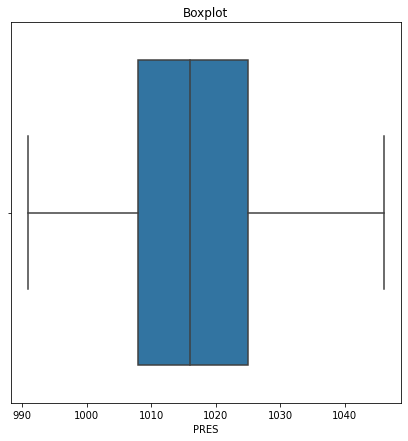

In [15]:
#checking outliers

plt.figure(figsize=(7,7))
g = sns.boxplot(df_atmosferica['PRES'])
g.set_title('Boxplot')

Text(0, 0.5, 'Atmosferic Pressure hPa')

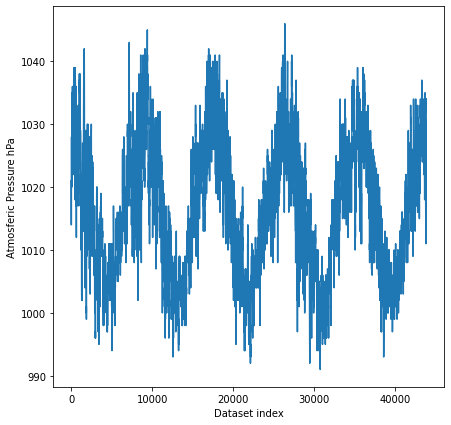

In [16]:
#plotting data

plt.figure(figsize=(7,7))
g = sns.lineplot(x=df_atmosferica.index,y=df_atmosferica['PRES'])
g.set_xlabel('Dataset index')
g.set_ylabel('Atmosferic Pressure hPa')

Data preparation for neural net MLP

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_atmosferica['PRES_normalizado'] = scaler.fit_transform(np.array(df_atmosferica['PRES']).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
df_atmosferica.head()

,datetime,PRES,PRES_normalizado
0,2010-01-01 00:00:00,1021.0,0.545455
1,2010-01-01 01:00:00,1020.0,0.527273
2,2010-01-01 02:00:00,1019.0,0.509091
3,2010-01-01 03:00:00,1019.0,0.509091
4,2010-01-01 04:00:00,1018.0,0.490909


In [19]:
#splitting train test data

date_thereshold = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_trainning = df_atmosferica.loc[df_atmosferica['datetime']<date_thereshold]
df_testing = df_atmosferica.loc[df_atmosferica['datetime']>=date_thereshold]
print('Qty entries for trainning: ', df_trainning.shape)
print('Qty entries for testing: ', df_testing.shape)

Qty entries for trainning:  (35064, 3)
Qty entries for testing:  (8760, 3)


Text(0, 0.5, 'Entries normalized')

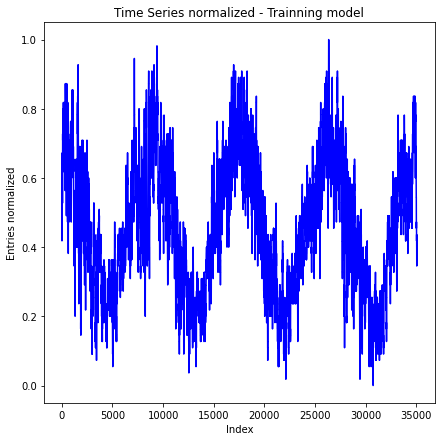

In [20]:
#checking trainning data

plt.figure(figsize=(7,7))
g = sns.lineplot(x=df_trainning.index, y=df_trainning['PRES_normalizado'], color='b')
g.set_title('Time Series normalized - Trainning model')
g.set_xlabel('Index')
g.set_ylabel('Entries normalized')

Text(0, 0.5, 'Entries normalized')

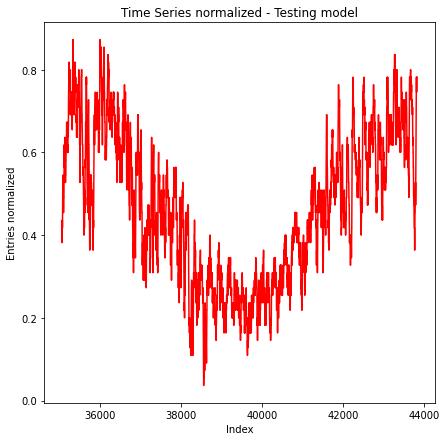

In [21]:
#checking testing data

plt.figure(figsize=(7,7))
g = sns.lineplot(x=df_testing.index, y=df_testing['PRES_normalizado'], color='r')
g.set_title('Time Series normalized - Testing model')
g.set_xlabel('Index')
g.set_ylabel('Entries normalized')


In [22]:
#setting data to be used on forecasting

def formata_entrada_saida(serie_temporal_original, numero_de_passos):
  X = []
  y = []
  for i in range(numero_de_passos, serie_temporal_original.shape[0]):
    X.append(list(serie_temporal_original.loc[i-numero_de_passos:i-1]))
    y.append(serie_temporal_original.loc[i])
  X,y = np.array(X), np.array(y)
  return X, y

In [23]:
#formating data for trainning

X_train, y_train = formata_entrada_saida(df_trainning['PRES_normalizado'],10)
print('Data shape: ', X_train.shape, y_train.shape)

Data shape:  (35054, 10) (35054,)


In [24]:
X_train[1:15,:]

array([[0.52727273, 0.50909091, 0.50909091, 0.49090909, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727],
       [0.50909091, 0.50909091, 0.49090909, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727],
       [0.50909091, 0.49090909, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.43636364],
       [0.49090909, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.43636364, 0.43636364],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.43636364, 0.43636364, 0.41818182],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.43636364, 0.43636364, 0.41818182, 0.41818182],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.43636364, 0.43636364, 0.41818182, 0.41818182, 0.43636364],
       [0.47272727, 0.47272727, 0.4727272

In [25]:
X_test, y_test = formata_entrada_saida(df_testing['PRES_normalizado'].reset_index(drop=True),10)
print('Data shape: ', X_test.shape, y_test.shape)

Data shape:  (8750, 10) (8750,)


In [26]:
X_test[1:15,:]

array([[0.4       , 0.4       , 0.4       , 0.38181818, 0.38181818,
        0.38181818, 0.4       , 0.4       , 0.41818182, 0.43636364],
       [0.4       , 0.4       , 0.38181818, 0.38181818, 0.38181818,
        0.4       , 0.4       , 0.41818182, 0.43636364, 0.43636364],
       [0.4       , 0.38181818, 0.38181818, 0.38181818, 0.4       ,
        0.4       , 0.41818182, 0.43636364, 0.43636364, 0.43636364],
       [0.38181818, 0.38181818, 0.38181818, 0.4       , 0.4       ,
        0.41818182, 0.43636364, 0.43636364, 0.43636364, 0.41818182],
       [0.38181818, 0.38181818, 0.4       , 0.4       , 0.41818182,
        0.43636364, 0.43636364, 0.43636364, 0.41818182, 0.41818182],
       [0.38181818, 0.4       , 0.4       , 0.41818182, 0.43636364,
        0.43636364, 0.43636364, 0.41818182, 0.41818182, 0.41818182],
       [0.4       , 0.4       , 0.41818182, 0.43636364, 0.43636364,
        0.43636364, 0.41818182, 0.41818182, 0.41818182, 0.41818182],
       [0.4       , 0.41818182, 0.4363636

Modeling MLP (Multi Layer Perceptron) Network

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import SGD #set optimization model gradient descent

In [28]:
#set entrance layer

input_layer = Input(shape=(10,), dtype='float32')

In [29]:
#adding hidden layers

dense_layer1 = Dense(32, activation='linear')(input_layer)
dense_layer2 = Dense(16, activation='linear')(dense_layer1)
dense_layer3 = Dense(16, activation='linear')(dense_layer2)

In [30]:
#adding dropout layer
#its a way to regularize the model
#it helps to avoid overfitting

dropout_layer = Dropout(0.2)(dense_layer3)

In [31]:
#exit layer
#one dimension, because we want to predict hPa based previous data
output_layer = Dense(1, activation='linear')(dropout_layer)

In [32]:
#setting up the model
model_MLP = tf.keras.Model(inputs=input_layer,outputs=output_layer)

In [33]:
#showing the model
model_MLP.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
___________________________________________________________

In [34]:
#setting up the error function and the optimizer to be utilized
model_MLP.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
#trainning the model
model_MLP.fit(x=X_train,y=y_train,batch_size=16,epochs=20, verbose=1,shuffle=True)

Epoch 1/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0030
Epoch 2/20
2191/2191 [==============================] - 3s 1ms/step - loss: 9.7895e-04
Epoch 3/20
2191/2191 [==============================] - 3s 1ms/step - loss: 8.4590e-04
Epoch 4/20
2191/2191 [==============================] - 3s 1ms/step - loss: 8.3899e-04
Epoch 5/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.8937e-04
Epoch 6/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.7416e-04
Epoch 7/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.8282e-04
Epoch 8/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.7683e-04
Epoch 9/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.8058e-04
Epoch 10/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.6980e-04
Epoch 11/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.6401e-04
Epoch 12/20
2191/2191 [======================

In [36]:
#making prediction

predict = model_MLP.predict(X_test)
predict_PRES = scaler.inverse_transform(predict)
predict_PRES.shape

(8750, 1)

In [37]:
#removing one dimension

predict_PRES = np.squeeze(predict_PRES)
predict_PRES.shape

(8750,)

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2 = r2_score(df_testing['PRES'].iloc[10:], predict_PRES)
print('R2 Score for MLP ', round(r2,4))

R2 Score for MLP  0.9957


Text(0.5, 0, 'Index')

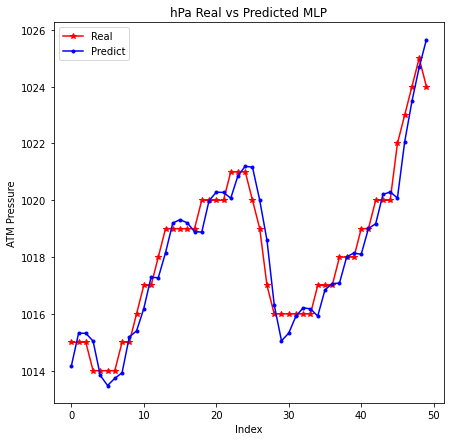

In [40]:
#plotting predict vs real

plt.figure(figsize=(7,7))
plt.plot(range(50), df_testing['PRES'].iloc[10:60], linestyle='-',marker='*', color='r')
plt.plot(range(50), predict_PRES[:50], linestyle='-',marker='.', color='b')
plt.legend(['Real','Predict'], loc=2)
plt.title('hPa Real vs Predicted MLP')
plt.ylabel('ATM Pressure')
plt.xlabel('Index')

Applying CNN - Model

In [41]:
from tensorflow.keras.layers import Flatten #transform data in one dimension
from tensorflow.keras.layers import ZeroPadding1D #complete data after convolution
from tensorflow.keras.layers import Conv1D #convolutional layer
from tensorflow.keras.layers import AveragePooling1D #average layer for data reduction

In [42]:
#input layer
input_layer = Input(shape=(10,1),dtype='float32')

In [43]:
#add padding layer
layer_padding = ZeroPadding1D(padding=1)(input_layer) #keep the same data amount

In [44]:
#concolutional layer
layer_convolution_1d = Conv1D(64,3,strides=1,use_bias=True)(layer_padding)

In [45]:
#pooling layer
layer_pooling = AveragePooling1D(pool_size=3,strides=1)(layer_convolution_1d)

In [46]:
#flatten layer
layer_flatten = Flatten()(layer_pooling) #applied to reshape data from a vector

In [47]:
#adding dropout layer
layer_dropout_cnn = Dropout(0.2)(layer_flatten)

In [48]:
#output layer
layer_output = Dense(1,activation='linear')(layer_dropout_cnn)

In [49]:
#building a model
model_cnn = tf.keras.Model(inputs=input_layer,outputs=layer_output)

In [50]:
#showing the model
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
zero_padding1d (ZeroPadding1 (None, 12, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 10, 64)            256       
_________________________________________________________________
average_pooling1d (AveragePo (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513 

In [51]:
#adding loss function and optimizer
model_cnn.compile(loss='mean_absolute_error', optimizer='adam')

In [52]:
#transform trainning and testing data to 3D, because CNN requires it
X_train,X_test = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),X_test.reshape((X_test.shape[0],X_test.shape[1], 1))

In [53]:
print('Data shape for trainning and test',X_train.shape, X_test.shape)

Data shape for trainning and test (35054, 10, 1) (8750, 10, 1)


In [54]:
#trainning the model
model_cnn.fit(x=X_train,y=y_train,batch_size=16,epochs=20,verbose=1,shuffle=True)

Epoch 1/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0275
Epoch 2/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0177
Epoch 3/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0155
Epoch 4/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0144
Epoch 5/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0143
Epoch 6/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0138
Epoch 7/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0137
Epoch 8/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0135
Epoch 9/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0138
Epoch 10/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0135
Epoch 11/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0134
Epoch 12/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0136
E

In [55]:
#forecast CNN
predict_cnn = model_cnn.predict(X_test)
PRES_cnn = np.squeeze(scaler.inverse_transform(predict_cnn))

In [56]:
#r2 score
r2_cnn = r2_score(df_testing['PRES'].iloc[10:], PRES_cnn)
print(' r2 score ',round(r2_cnn,4))

 r2 score  0.995


Text(0.5, 0, 'Index')

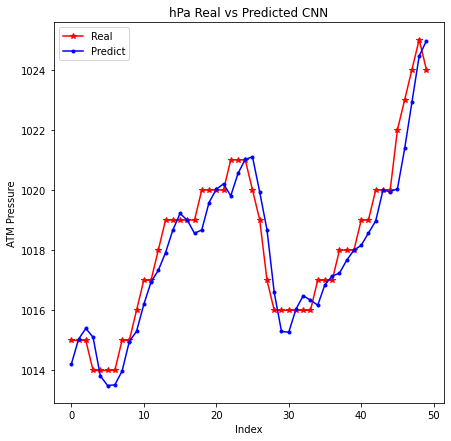

In [57]:
#plotting predict vs real

plt.figure(figsize=(7,7))
plt.plot(range(50), df_testing['PRES'].iloc[10:60], linestyle='-',marker='*', color='r')
plt.plot(range(50), PRES_cnn[:50], linestyle='-',marker='.', color='b')
plt.legend(['Real','Predict'], loc=2)
plt.title('hPa Real vs Predicted CNN')
plt.ylabel('ATM Pressure')
plt.xlabel('Index')